In [1]:
import numpy as np
import pandas as pd

In [2]:
# get the data
# emotions = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

df=pd.read_csv('./../Herhalingsoefening/facerec2013.csv', sep = ' ')
df.head(10)

emotion  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0        0      70      80      82      72      58      58      60      63   
1        0     151     150     147     155     148     133     111     140   
2        2     231     212     156     164     174     138     161     173   
3        4      24      32      36      30      32      23      19      20   
4        6       4       0       0       0       0       0       0       0   
5        2      55      55      55      55      55      54      60      68   
6        4      20      17      19      21      25      38      42      42   
7        3      77      78      79      79      78      75      60      55   
8        3      85      84      90     121     101     102     133     153   
9        2     255     254     255     254     254     179     122     107   

   pixel9  ...  pixel2296  pixel2297  pixel2298  pixel2299  pixel2300  \
0      54  ...        182        183        136        106        116   
1     170  ...        108         95        108        102         67   
2     182  ...        138        152        122        114        101   
3      30  ...        126        132        132        133        136   
4       0  ...         34         31         31         31         27   
5      54  ...         83         77         53         37         34   
6      46  ...         36         68         91         85         93   
7      47  ...        124        139        150        179        180   
8     153  ...        151        111        106        102         99   
9      95  ...        176        188        251        252        253   

   pixel2301  pixel2302  pixel2303  pixel2304     usage  
0         95        106        109         82  Training  
1        171        193        183        184  Training  
2         97         88        110        152  Training  
3        139        142        143        142  Training  
4         31         30         29         30  Training  
5         30         34         30         57  Training  
6         97         99        107        118  Training  
7        175        125         67         68  Training  
8         89         58         73         84  Training  
9        253        254        255        255  Training  

[10 rows x 2306 columns]

In [3]:
# There are 3 kind of usages (usage is the last column): which?
df.groupby('usage').count()

emotion  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
usage                                                                          
PrivateTest     3589    3589    3589    3589    3589    3589    3589    3589   
PublicTest      3589    3589    3589    3589    3589    3589    3589    3589   
Training       28709   28709   28709   28709   28709   28709   28709   28709   

             pixel8  pixel9  ...  pixel2295  pixel2296  pixel2297  pixel2298  \
usage                        ...                                               
PrivateTest    3589    3589  ...       3589       3589       3589       3589   
PublicTest     3589    3589  ...       3589       3589       3589       3589   
Training      28709   28709  ...      28709      28709      28709      28709   

             pixel2299  pixel2300  pixel2301  pixel2302  pixel2303  pixel2304  
usage                                                                          
PrivateTest       3589       3589       3589       3589       3589       3589  
PublicTest        3589       3589       3589       3589       3589       3589  
Training         28709      28709      28709      28709      28709      28709  

[3 rows x 2305 columns]

In [4]:
# Transform the usage to 2 values: Training or Testing (instead of PublicTest and PrivateTest)
df['usage'] = np.where(df['usage'] == 'Training', 'Training', 'Testing')

In [5]:
# Check if there are indeed 2 kind of usages left
df.groupby('usage').count()

emotion  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
usage                                                                       
Testing      7178    7178    7178    7178    7178    7178    7178    7178   
Training    28709   28709   28709   28709   28709   28709   28709   28709   

          pixel8  pixel9  ...  pixel2295  pixel2296  pixel2297  pixel2298  \
usage                     ...                                               
Testing     7178    7178  ...       7178       7178       7178       7178   
Training   28709   28709  ...      28709      28709      28709      28709   

          pixel2299  pixel2300  pixel2301  pixel2302  pixel2303  pixel2304  
usage                                                                       
Testing        7178       7178       7178       7178       7178       7178  
Training      28709      28709      28709      28709      28709      28709  

[2 rows x 2305 columns]

In [6]:
# Create X_train, y_train, X_test, y_test based on the column usage
X_train = df[df['usage'] == 'Training']
y_train = df[df['usage'] == 'Training']['emotion']
X_test = df[df['usage'] == 'Testing']
y_test = df[df['usage'] == 'Testing']['emotion']

In [7]:
# Drop the columns of X_train and X_test that aren't needed any more
X_train = X_train.drop(['emotion', 'usage'], axis = 1)
X_test = X_test.drop(['emotion', 'usage'], axis = 1)

In [8]:
# Transform X_train, y_train, X_test, y_test to a numpy array
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [9]:
# What are the dimensions of X_train
X_train.shape

(28709, 2304)

In [10]:
# What are the dimensions of X_test
X_test.shape

(7178, 2304)

In [11]:
# How many images are there for each emotion?
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([3995,  436, 4097, 7215, 4830, 3171, 4965], dtype=int64))

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


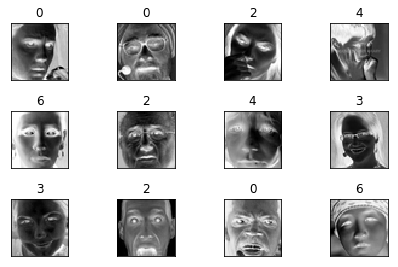

In [13]:
# Plot the first 25 images
# imports for plotting
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

%matplotlib inline

X_train = X_train.reshape(28709, 48, 48)

fig = plt.figure()
for i in range(12):
  plt.subplot(3,4,i+1)  # i+1 is position of subplot in 3 x 4 table
  plt.tight_layout()    # "tight" layout
  # show bitmap, interpret 0 as white and 255 as black (grayvalues)
  plt.imshow(X_train[i], cmap=plt.cm.gray_r)
  plt.title(y_train[i])   # real value as title
  plt.xticks([])   # no ticks on x axis
  plt.yticks([])   # not ticks on y axis

In [16]:
# let's print the shape before we reshape and normalize of X_train, y_train, X_test, y_test



# building the input vector from the 48x48 pixels = linearize the image to get a 2304 (= 48x48) vector

X_train = X_train.reshape(28709, 48, 48, 1)
X_test = X_test.reshape(7178, 48, 48, 1)

# normalizing the data to help with the training
# normalized data leads to better models

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# print the final input shape ready for training

print(X_train.shape)
print(X_test.shape)

(28709, 48, 48, 1)
(7178, 48, 48, 1)


In [15]:
# one-hot encoding using keras' numpy-related utilities for y_train and y_test

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
print(y_train.shape)
print(y_train[0])  # one sample’s categorical data
y_test = to_categorical(y_test)
print(y_test.shape)

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(28709, 7)
[1. 0. 0. 0. 0. 0. 0.]
(7178, 7)


In [16]:
# Imports needed
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D,  BatchNormalization, Activation, Dropout

In [17]:
# Create a CNN
cnn = Sequential() 

In [18]:
# Add layers
cnn.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', input_shape=(48, 48, 1)))
cnn.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(128, (5, 5),activation='relu'))
cnn.add(Conv2D(128, (5, 5),activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(256, (3, 3),activation='relu'))
cnn.add(Conv2D(256, (3, 3),activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(128))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(7))
cnn.add(Activation('softmax'))

In [19]:
# Write out the summary of the CNN
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 44, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 40, 40, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 128)       5

In [20]:
# Compile the CNN



In [ ]:
# Train the CNN



Train on 25838 samples, validate on 2871 samples
Epoch 1/5
25838/25838 [==============================] - 601s 23ms/sample - loss: 1.7921 - accuracy: 0.2854 - val_loss: 1.8201 - val_accuracy: 0.2825
Epoch 2/5
10624/25838 [===========>..................] - ETA: 5:40 - loss: 1.5512 - accuracy: 0.4044

In [ ]:
# Use the CNN to make predictions for the test data

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(X_train, y_train,epochs=5,verbose=2)  



In [ ]:
# saving the model
import os
save_dir = "./"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

In [ ]:
mnist_model = load_model('keras_mnist.h5')
loss, accuracy = mnist_model.evaluate(X_test, y_test)

print("Test Loss", loss)
print("Test Accuracy", accuracy)

In [ ]:
# What are the probabilities for the first element in the test set?
model = load_model('keras_mnist.h5')

predictions = model.predict(X_test)
# The first digit should be a 7 (shown as 1. at index 7)
y_test[0]

# Check the probabilities returned by predict for first test sample
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')
    
# Our model believes this digit is a 7 with nearly 100% certainty
# Not all predictions have this level of certainty


In [ ]:
# What is the number of incorrect predictions?

# Locating the Incorrect Predictions

incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append((i, predicted, expected))
len(incorrect_predictions)